### 1. 여러개의 그래프

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# path = 'C:/Users/YOnSAI/AppData/Local/Microsoft/Windows/Fonts' 
# fm.fontManager.addfont(path + '/D2Coding-Ver1.3.2-20180524.ttf')
# plt.rcParams['font.family'] = 'D2Coding'

- Figure 객체

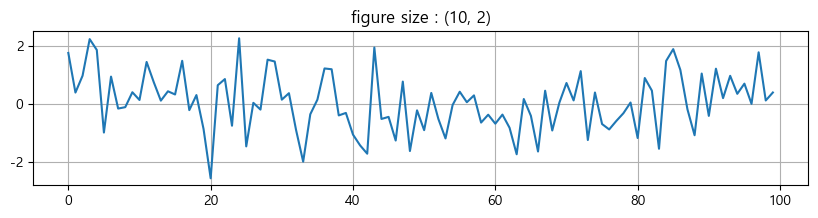

In [6]:
np.random.seed(0)
plt.figure(figsize=(10, 2))
plt.title('figure size : (10, 2)')
plt.plot(np.random.randn(100))
plt.grid()
plt.show()

- subplot()

In [7]:
from PIL import Image
img1 = Image.open('data/output.png')
img2 = Image.open('data/삼각함수.png')

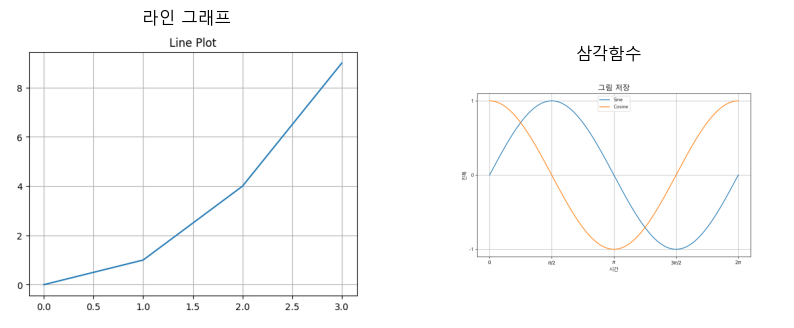

In [8]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)  # 행의 개수, 열의 개수, 순서(1부터시작)
plt.imshow(img1), plt.title('라인 그래프'), plt.axis('off')
plt.subplot(122)
plt.imshow(img2), plt.title('삼각함수'), plt.axis('off')
plt.show()

- Anscombe's Quartet

In [9]:
ans = sns.load_dataset('anscombe')
ans.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


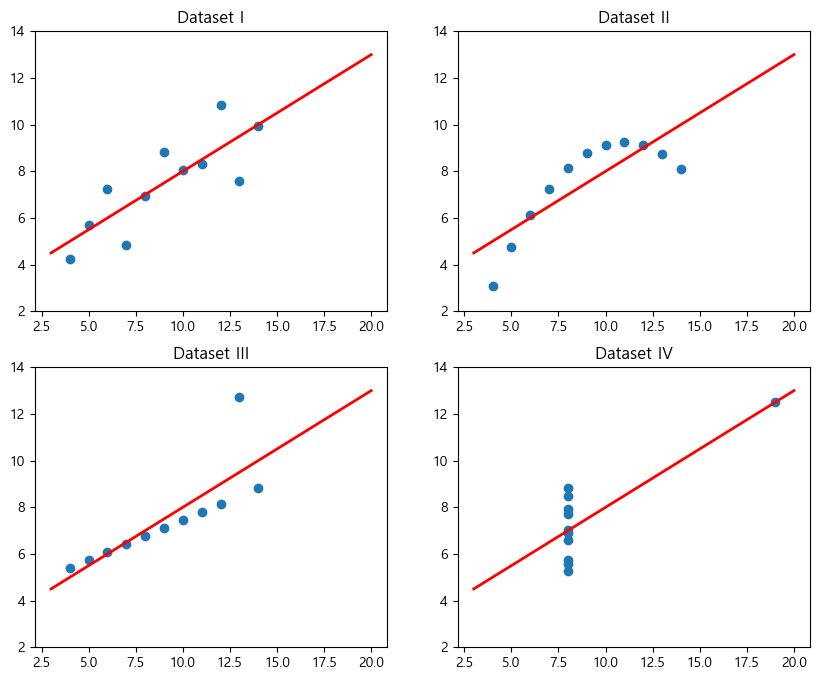

In [10]:

plt.figure(figsize=(10, 8))

for index, roman in enumerate(ans.dataset.unique()):
    ds = ans[ans.dataset == roman]
    plt.subplot(2, 2, index+1)
    plt.scatter(ds.x, ds.y, marker='o')
    plt.plot([3, 20], [4.5, 13], 'r-', lw=2)
    plt.title(f'Dataset {roman}')
    plt.ylim(2, 14)
    # plt.xticks([2, 5, 10, 15, 20])
    # plt.yticks([3, 4, 6, 8, 10, 13])
plt.show()

- subplots()

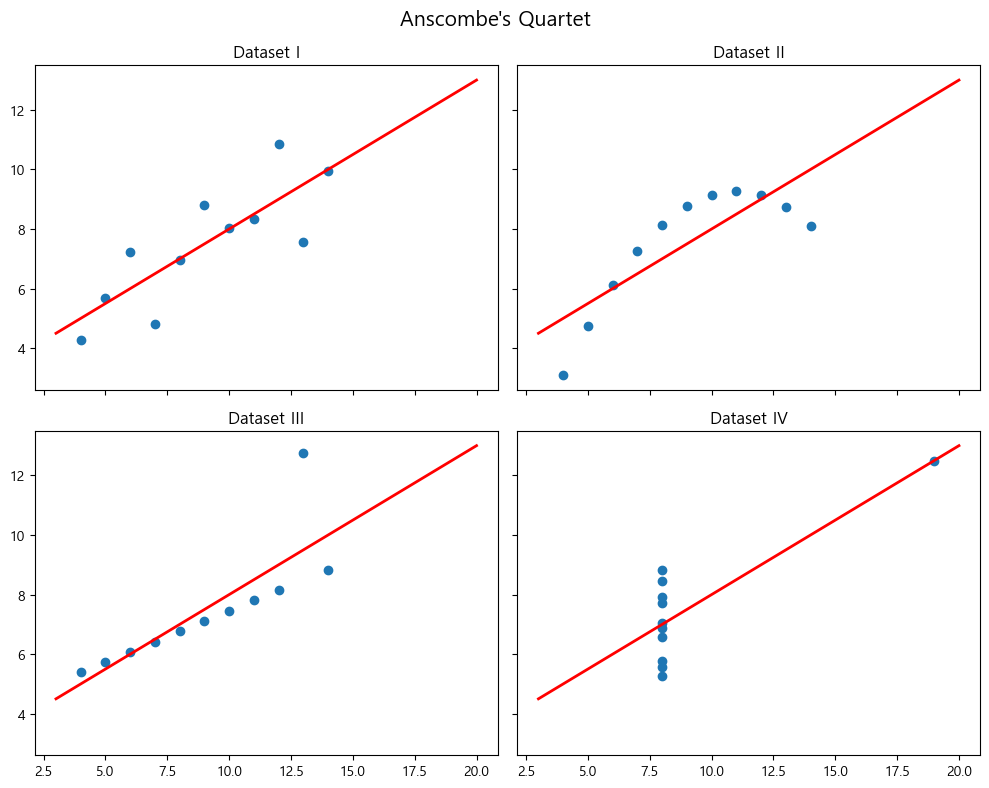

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)

for index, roman in enumerate(ans.dataset.unique()):
    ds = ans[ans.dataset == roman]
    ax = axes[index//2, index%2]    # row index, column index
    ax.scatter(ds.x, ds.y, marker='o')
    ax.plot([3, 20], [4.5, 13], 'r-', lw=2)
    ax.set_title(f'Dataset {roman}')
fig.suptitle("Anscombe's Quartet", fontsize=15)
plt.tight_layout()
plt.show()

- Axis 객체와 축

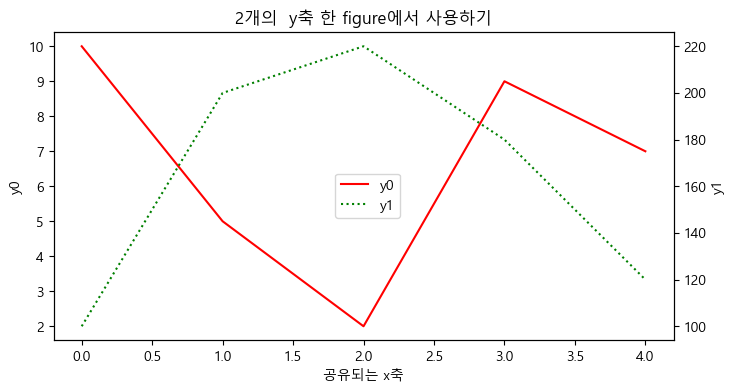

In [35]:
fig, ax0 = plt.subplots(figsize=(8, 4))
ax1 = ax0.twinx()
ax0.set_title('2개의  y축 한 figure에서 사용하기')
ax0.plot([10, 5, 2, 9, 7], 'r-', label='y0')
ax0.set_ylabel('y0')
# ax0.grid(False)
ax1.plot([100, 200, 220, 180, 120], 'g:', label='y1')
ax1.set_ylabel('y1')
# ax1.grid(False)
ax0.set_xlabel('공유되는 x축')
fig.legend(loc=10)
# plt.legend()
plt.show()

- 갤러리에 있는 그래프를 그려 보세요

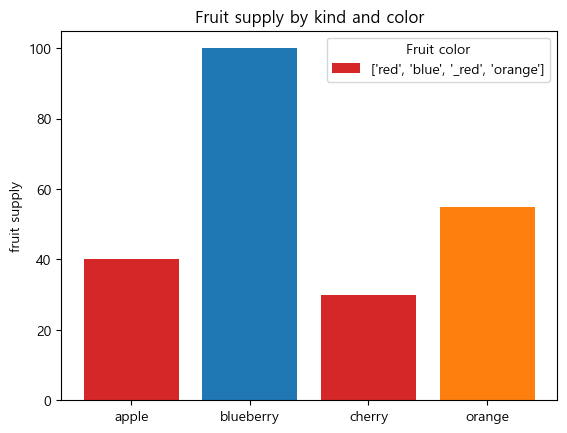

In [13]:
fig, ax = plt.subplots()

fruits = ['apple', 'blueberry', 'cherry', 'orange']
counts = [40, 100, 30, 55]
bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('fruit supply')
ax.set_title('Fruit supply by kind and color')
ax.legend(title='Fruit color')

plt.show()

- Iris 모든 품종의 특성에 대한 박스플롯을 하나의 그래프안에 그리기

In [14]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [16]:
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

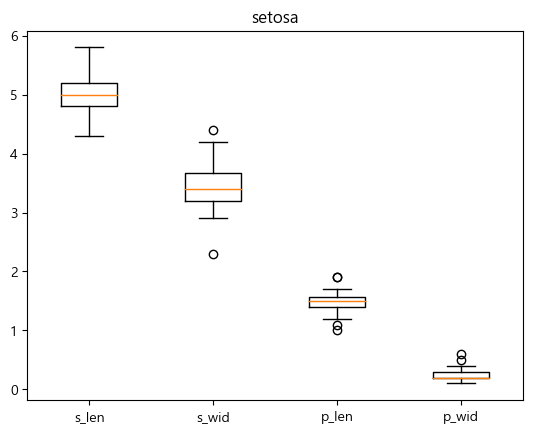

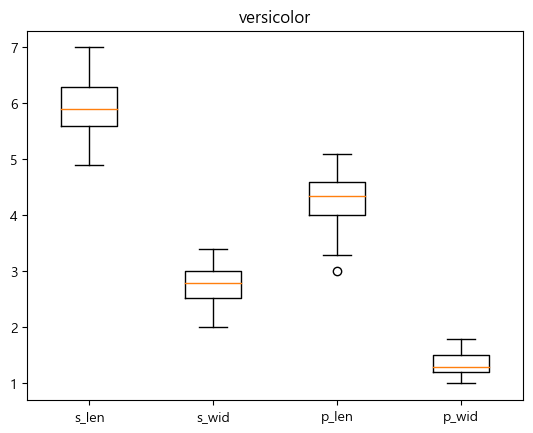

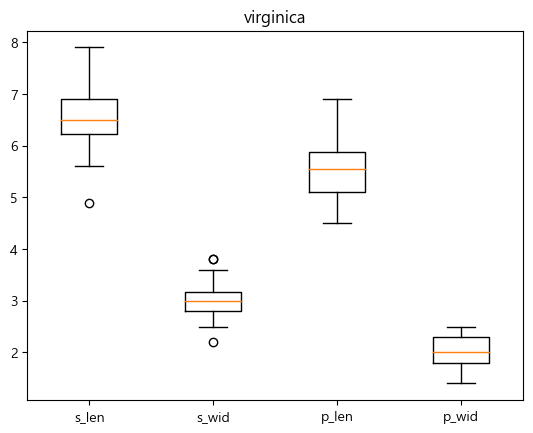

In [17]:
for index, spec_name in enumerate(iris.species.unique()):
    total = []
    for col_name in cols:
        x = iris[iris.species == spec_name][col_name]
        total.append(x)
    plt.boxplot(total, labels=['s_len', 's_wid', 'p_len', 'p_wid'])
    plt.title(f'{spec_name}')
    plt.show()



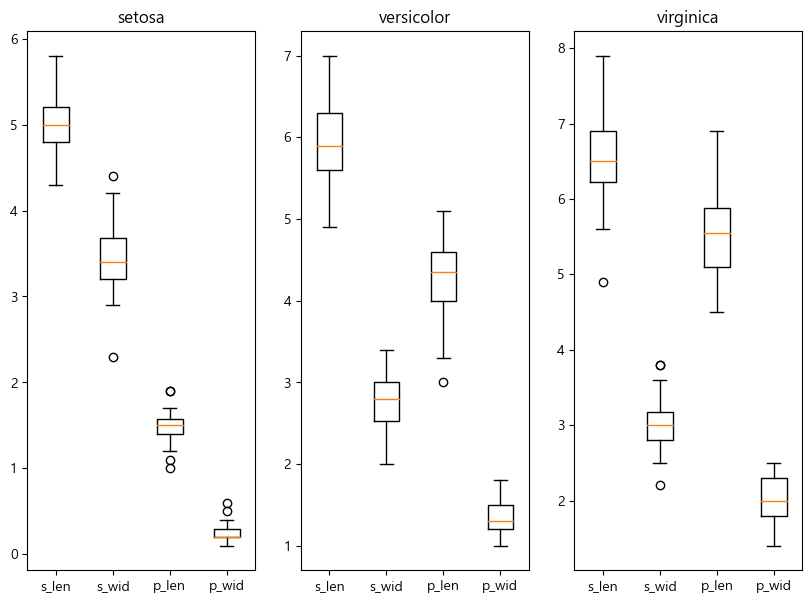

In [18]:
plt.figure(figsize=(10, 7))
for index, spec_name in enumerate(iris.species.unique()):
    total = []
    for col_name in cols:
        total.append(iris[iris.species == spec_name][col_name])
    plt.subplot(1, 3, index+1)
    plt.boxplot(total, labels=['s_len', 's_wid', 'p_len', 'p_wid'])
    plt.title(f'{spec_name}')
plt.show()


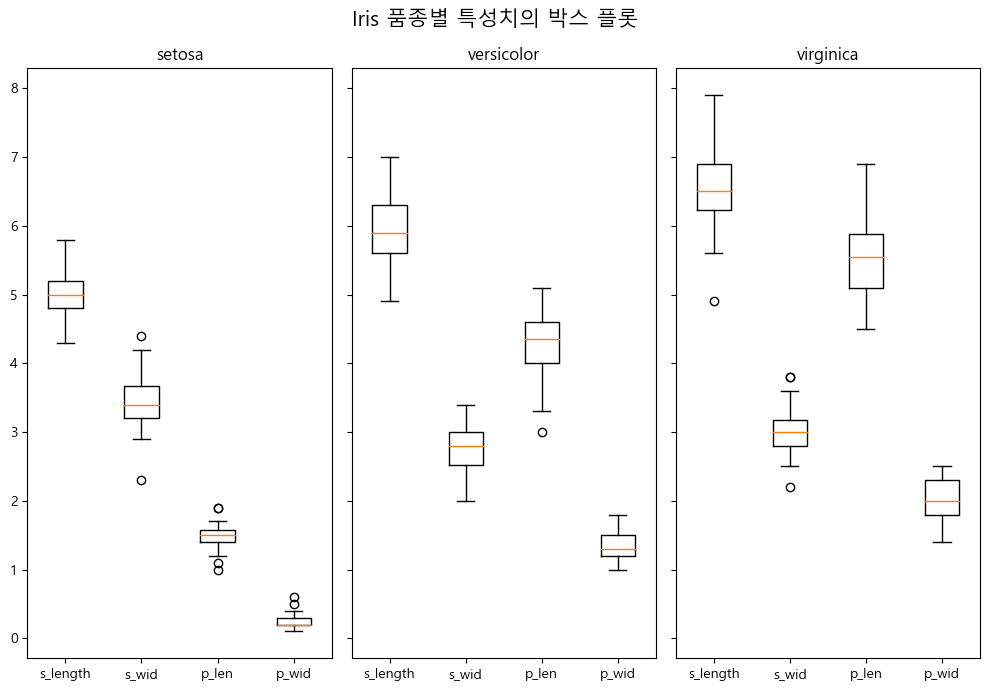

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(10, 7), sharey=True)
for index, spec_name in enumerate(iris.species.unique()):
    total = []
    for col_name in cols:
        total.append(iris[iris.species == spec_name][col_name])
    ax = axes[index]
    ax.boxplot(total, labels=['s_length', 's_wid', 'p_len', 'p_wid'])
    ax.set_title(f'{spec_name}')
fig.suptitle("Iris 품종별 특성치의 박스 플롯", fontsize=15)
plt.tight_layout()
plt.show()

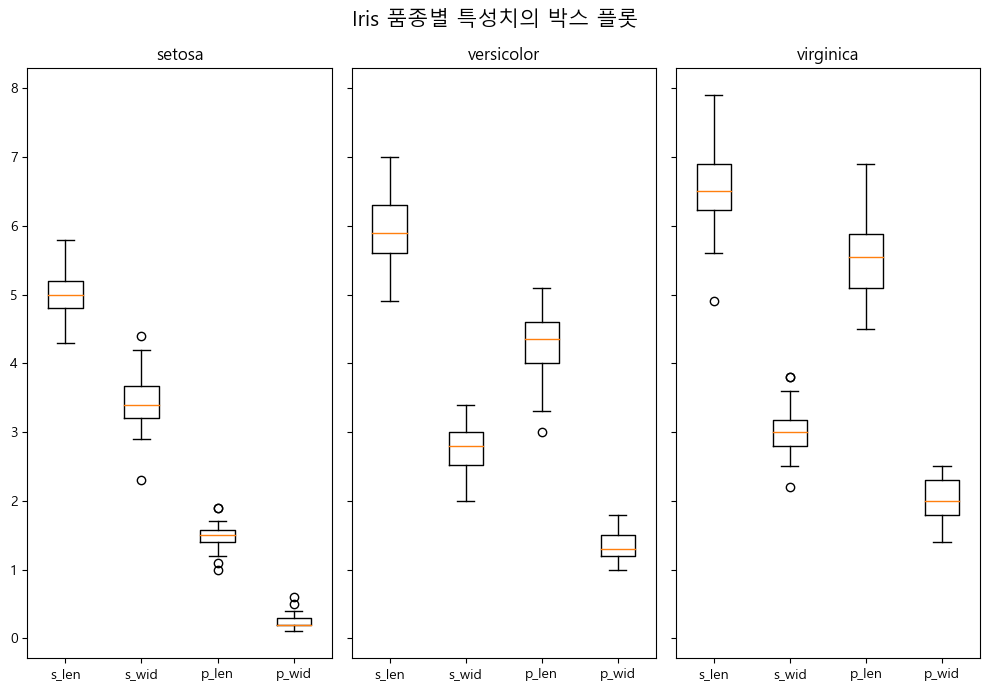

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(10, 7), sharey=True)
for index, spec_name in enumerate(iris.species.unique()):
    sl = iris[iris.species == spec_name].sepal_length
    sw = iris[iris.species == spec_name].sepal_width
    pl = iris[iris.species == spec_name].petal_length
    pw = iris[iris.species == spec_name].petal_width
    ax = axes[index]
    ax.boxplot((sl, sw, pl, pw), labels=['s_len', 's_wid', 'p_len', 'p_wid'])
    ax.set_title(f'{spec_name}')
fig.suptitle("Iris 품종별 특성치의 박스 플롯", fontsize=15)
plt.tight_layout()
plt.show()
